In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset
   )

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(label_batch.shape)
    print(image_batch[0])

(32, 256, 256, 3)
[0 0 1 1 1 0 2 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 2 1 1 1 1 0]
(32,)
tf.Tensor(
[[[170. 172. 184.]
  [173. 175. 187.]
  [172. 174. 186.]
  ...
  [189. 192. 201.]
  [192. 195. 204.]
  [194. 197. 206.]]

 [[163. 165. 177.]
  [166. 168. 180.]
  [167. 169. 181.]
  ...
  [188. 191. 200.]
  [187. 190. 199.]
  [187. 190. 199.]]

 [[162. 164. 176.]
  [166. 168. 180.]
  [168. 170. 182.]
  ...
  [187. 190. 199.]
  [186. 189. 198.]
  [185. 188. 197.]]

 ...

 [[145. 142. 151.]
  [138. 135. 144.]
  [131. 128. 137.]
  ...
  [170. 168. 179.]
  [158. 156. 167.]
  [153. 151. 162.]]

 [[132. 129. 138.]
  [130. 127. 136.]
  [127. 124. 133.]
  ...
  [158. 156. 167.]
  [156. 154. 165.]
  [145. 143. 154.]]

 [[122. 119. 128.]
  [129. 126. 135.]
  [136. 133. 142.]
  ...
  [157. 155. 166.]
  [164. 162. 173.]
  [152. 150. 161.]]], shape=(256, 256, 3), dtype=float32)


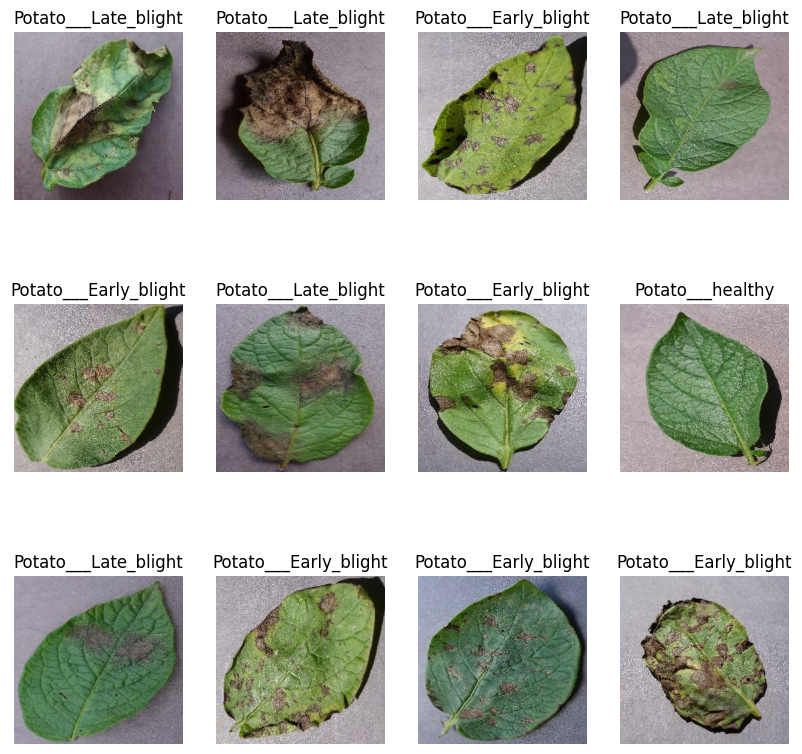

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_name[label_batch[i]])
#     print(image_batch[0])

In [8]:
len(dataset)

68

In [9]:
# training dataset=> 80 %
# validation => 10%
# test =>10%
train_size=int(0.8*len(dataset))
train_ds=dataset.take(train_size)
len(train_ds)

54

In [10]:
test_ds=dataset.skip(train_size)
len(test_ds)

14

In [11]:
vald_size=int(0.5*len(test_ds))
vald_ds=test_ds.take(vald_size)

test_ds=test_ds.skip(vald_size)



In [12]:
def get_detaset_partitions_tf(dataset,shuffle=True,shuffle_size=10000):
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    
    train_size=int(0.8*len(dataset))
    train_ds=dataset.take(train_size)
    
    test_ds=dataset.skip(train_size)
    
    valid_size=int(0.5*len(test_ds))
    valid_ds=test_ds.take(vald_size)
    
    test_ds=test_ds.skip(vald_size)
    
    return train_ds,valid_ds,test_ds

In [13]:
train_ds,valid_ds,test_ds=get_detaset_partitions_tf(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(test_ds)

7

In [16]:
len(valid_ds)

7

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vald_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentaion=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentaion,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [21]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=vald_ds
)

Epoch 1/20
54/54 [==============================] - 91s 2s/step - loss: 0.9032 - accuracy: 0.4873 - val_loss: 0.8374 - val_accuracy: 0.5000
Epoch 2/20
54/54 [==============================] - 79s 1s/step - loss: 0.5964 - accuracy: 0.7176 - val_loss: 0.3705 - val_accuracy: 0.8616
Epoch 3/20
54/54 [==============================] - 74s 1s/step - loss: 0.3748 - accuracy: 0.8484 - val_loss: 0.4279 - val_accuracy: 0.8304
Epoch 4/20
54/54 [==============================] - 74s 1s/step - loss: 0.2936 - accuracy: 0.8785 - val_loss: 0.3197 - val_accuracy: 0.8661
Epoch 5/20
54/54 [==============================] - 74s 1s/step - loss: 0.2654 - accuracy: 0.8970 - val_loss: 0.2451 - val_accuracy: 0.8839
Epoch 6/20
54/54 [==============================] - 79s 1s/step - loss: 0.2768 - accuracy: 0.8964 - val_loss: 0.3210 - val_accuracy: 0.8482
Epoch 7/20
54/54 [==============================] - 73s 1s/step - loss: 0.2270 - accuracy: 0.9080 - val_loss: 0.1464 - val_accuracy: 0.9420
Epoch 8/20
54/54 [==

In [25]:
scores=model.evaluate(test_ds)

7/7 [==============================] - 4s 274ms/step - loss: 0.0409 - accuracy: 0.9821


In [26]:
print(history.params)

{'verbose': 1, 'epochs': 20, 'steps': 54}


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
history.history['accuracy']

[0.48726850748062134,
 0.7175925970077515,
 0.8483796119689941,
 0.8784722089767456,
 0.8969907164573669,
 0.8964120149612427,
 0.9079861044883728,
 0.9461805820465088,
 0.9496527910232544,
 0.9189814925193787,
 0.9664351940155029,
 0.9699074029922485,
 0.9785879850387573,
 0.9710648059844971,
 0.9774305820465088,
 0.9392361044883728,
 0.9797453880310059,
 0.9803240895271301,
 0.9710648059844971,
 0.9826388955116272]

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

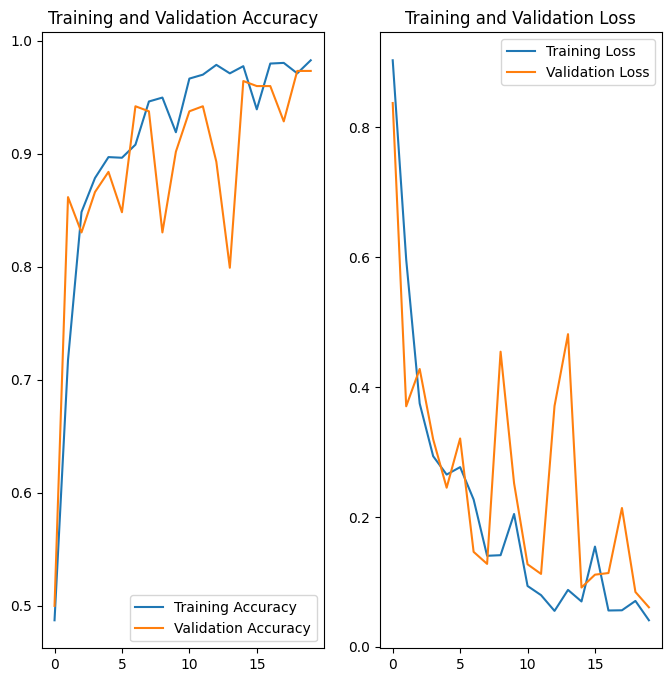

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actural label: Potato___Late_blight
predicted label: Potato___Late_blight


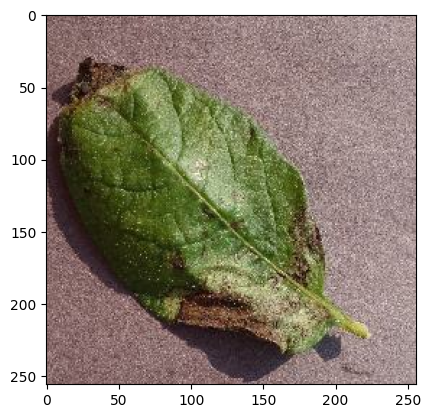

In [74]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("actural label:",class_name[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [70]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    predicted_class=class_name[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

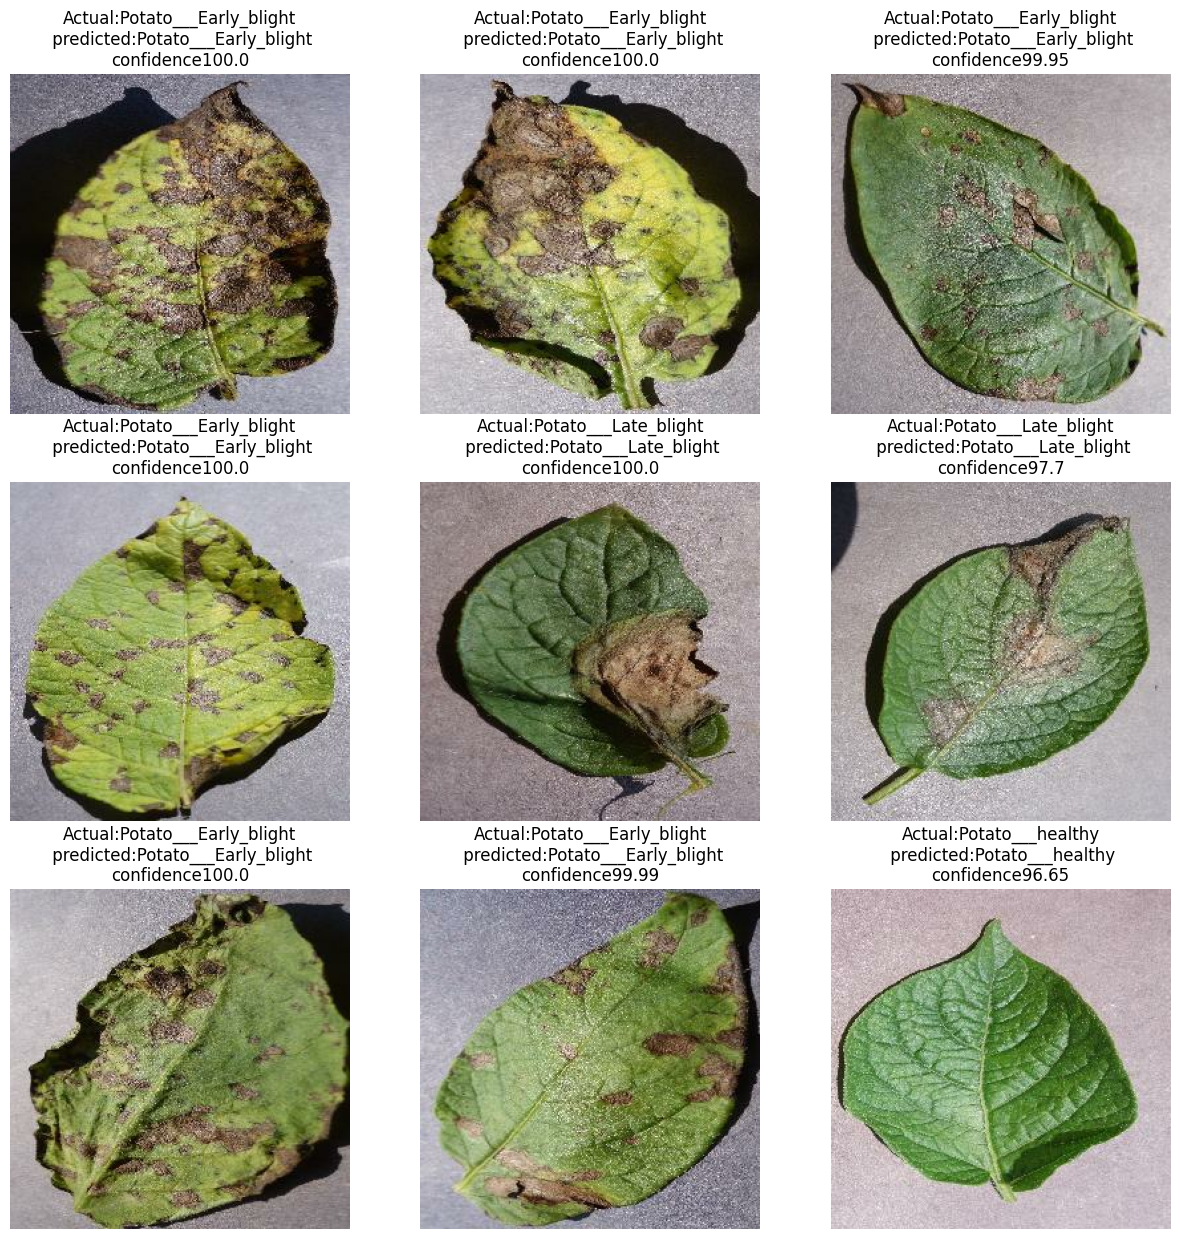

In [71]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_name[labels[i]]
        
        plt.title(f"Actual:{actual_class}\n predicted:{predicted_class}\nconfidence{confidence}")
        plt.axis("off")

In [78]:
import os

next_model_version=max([int(i) for i in os.listdir("../models")+[0]])+1

In [75]:
model_version=next_model_version
# model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets
